# Pymaceuticals
### Data Analysis for Pharmaceutical Treatment Study
Pymaceuticals -a company specialized in anti-cancer pharmaceuticals- is developing a potential treatment for squamous cell carcinoma (SCC). In this study, 249 mice identified with SCC tumor grow through a variety of drug regimens (including a Placebo). Over the course of 45 days, tumor development was observed and measured. The purpose of this study is to compare the performance of Pymaceuticals' drug of interest, **Capomulin**, versus the other treatment regimens.

## Observations and Insights

1. **Capomulin performance in tumor volume development shows to be an effective treatment for SCC**, as observed in the Boxplot comparison for Final Tumor Volume *(values can be found in the Distribution Summary)*:
 - The upper quartile (40.16 mm3) is below the initial tumor volume (45 mm3). This means that Capomulin succeeded in reducing the intial tumor volume in at least 75% of the treated mice. 
 - The interquantile range (IQR) for Capomulin is more compact than the treatments IQR used as benchmarks, indicating a consistent behaviour in tumor volume reduction. In addition, no potential outliers were found.<br><br>
 
2. **Capomulin shows a reduction in tumor volume along the duration (45 days) of the study**, according to the Line Plot for Tumor Volume Development *(random mouse sample with measurements for the complete time span of the study)*.<br><br>

3. **Average tumor volume has a direct relationship with mice weight**, as prompted by two key indicators:
 - Pearson correlation coefficient (0.84) shows a strong positive correlation (>0.70) between these two variables.
 - The linear reggression coefficent of determination (R^2) suggest that 70.89% of the average tumor volume can be explained by the mice weight.<br><br>

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
analysis_data = study_results.merge(mouse_metadata, how='left', on=['Mouse ID'])

# Display the data table for preview
analysis_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_num = len(analysis_data['Mouse ID'].unique())
print(f"Number of mice: {mouse_num}")

Number of mice: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = analysis_data['Mouse ID'].loc[analysis_data.duplicated(['Mouse ID', 'Timepoint'])].unique()
print(f"Duplicate mice ID (for Mouse ID and Timepoint): {duplicate_mice}")

Duplicate mice ID (for Mouse ID and Timepoint): ['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
print("Data for duplicate mice:")
analysis_data.loc[analysis_data.duplicated(['Mouse ID', 'Timepoint'])]

Data for duplicate mice:


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = analysis_data.drop_duplicates(['Mouse ID', 'Timepoint'], keep='first')
## Sort values by Mouse ID & Timepoint (alphabetical order)
clean_data = clean_data.sort_values(['Mouse ID','Timepoint'], ascending=True)
## Reset Index
clean_data = clean_data.reset_index(drop=True)
## Display Analysis DataFrame (preview)
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_num = len(clean_data['Mouse ID'].unique())
print(f"Number of mice: {mouse_num}")

Number of mice: 249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor_vol_mean = clean_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
tumor_vol_median = clean_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
tumor_vol_var = clean_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
tumor_vol_std = clean_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
tumor_vol_sem = clean_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame(data={
    "Mean": tumor_vol_mean,
    "Median": tumor_vol_median,
    "Variance": tumor_vol_var,
    "Std Dev": tumor_vol_std,
    "SEM": tumor_vol_sem
})

## Display Summary Statistics (with format)
summary_df.style.format('{:.4f}')

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.6757,41.5578,24.9478,4.9948,0.3293
Ceftamin,52.5912,51.7762,39.2902,6.2682,0.4698
Infubinol,52.8848,51.8206,43.1287,6.5672,0.4922
Ketapril,55.2356,53.6987,68.5536,8.2797,0.6039
Naftisol,54.3316,52.5093,66.1735,8.1347,0.5965
Placebo,54.0336,52.2889,61.1681,7.8210,0.5813
Propriva,52.3935,50.9100,43.1388,6.5680,0.5259
Ramicane,40.2167,40.6732,23.4867,4.8463,0.3210
Stelasyn,54.2331,52.4317,59.4506,7.7104,0.5731


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']}).style.format('{:.4f}')

## Bar and Pie Charts

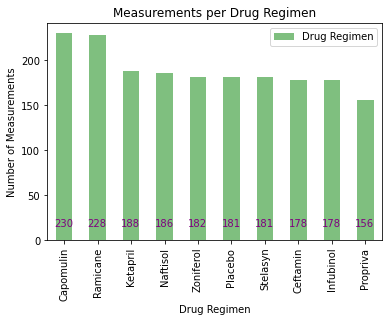

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
## Pandas Bar Plot
pd.DataFrame(clean_data['Drug Regimen'].value_counts()).plot(kind='bar', color='green', alpha=0.5)

# Give the chart a title, x label, and y label
plt.title("Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")

## Display value of each bar
measurements_num = list(clean_data['Drug Regimen'].value_counts().values)
for index, value in enumerate(measurements_num):
    plt.text(index-.3, 15, str(value), color='purple')

## Show plot
plt.show()

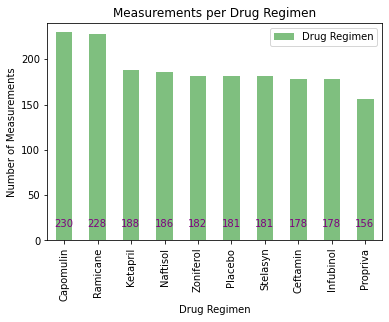

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
regime_counts = clean_data['Drug Regimen'].value_counts()
drug_regimen = list(regime_counts.index)
measurements_num = list(regime_counts.values)
labels = [regime_counts.name]

## BAR PLOT
## Set Bar Plot parameters
plt.bar(drug_regimen, measurements_num, color='green', alpha=0.5, align='center', width=0.5)

# Give the chart a title, x label, and y label
plt.title("Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")

# Set x_axis properties
x_axis = range(len(drug_regimen))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimen, rotation=90)

# Set the limits of the x axis
plt.xlim(-0.5, len(x_axis)-0.5)

# Set the limits of the y axis
plt.ylim(0, max(measurements_num)+10)

## Display value of each bar
for index, value in enumerate(measurements_num):
    plt.text(index-.3, 15, str(value), color='purple')

## Set plot legend
plt.legend(labels, loc='upper right')
## Show plot
plt.show()

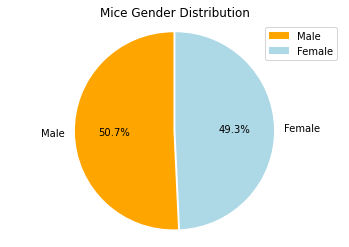

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
## Pandas Pie Plot
pd.DataFrame(clean_data['Sex'].value_counts()).plot(
    kind='pie', y='Sex', explode=(.01,.01), colors=('orange','lightblue'), autopct='%1.1f%%', startangle=90
)

# Give the chart a title and y label
plt.title("Mice Gender Distribution")
plt.ylabel('')

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

## Show plot
plt.show()

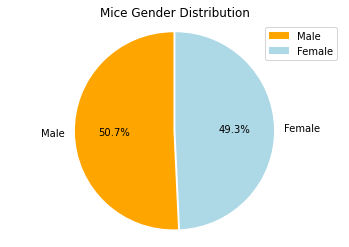

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = clean_data['Sex'].value_counts()

explode = [0.01, 0.01]
labels = [item for item in sex_counts.index]
colors = ['orange', 'lightblue']

## PIE PLOT
## Set Pie Plot parameters
plt.pie(sex_counts.values, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=90)

# Give the chart a title
plt.title("Mice Gender Distribution")

# Create axes which are equal so we have a perfect circle
plt.axis('equal')

## Set plot legend
plt.legend(labels, loc='upper right')
## Show plot
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_vol = pd.DataFrame(clean_data.groupby('Mouse ID').max()['Timepoint'])

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_vol = final_tumor_vol.merge(clean_data, how='left', on=['Mouse ID', 'Timepoint'])

## Display Final Tumor Volume DataFrame (preview)
final_tumor_vol.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

## Create empty dictionary to fill with treatment (key) and outliers (value)
outliers_dict = {}

## Build Final Tumor Volume Outliers Summary DataFrame
data_distribution = pd.DataFrame(index=[
    "Upper Quartile",
    "Median",
    "Lower Quartile",
    "IQR",
    "Upper Bound", 
    "Lower Bound",
    "Potential Outliers"
])

## Loop through Final Tumor Volume data
for i in range(len(treatments)):
    
    ## Get Final Tumor Volume for each Treatment
    tumor_vol_data.append(final_tumor_vol['Tumor Volume (mm3)'].loc[final_tumor_vol['Drug Regimen'] == treatments[i]])

    ## Compute Quartiles
    (upperq, median, lowerq) = tumor_vol_data[i].quantile([0.75, 0.5, 0.25])
    ## Compute Interquartile Range (IQR)
    iqr = upperq - lowerq
    ## Compute Upper & Lower boundaries
    upper_bound = upperq + (1.5*iqr)
    lower_bound = lowerq - (1.5*iqr)
    ## Determine outliers (using upper & lower boundaries)
    outliers = [round(value, 4) for value in tumor_vol_data[i].values if (value < lower_bound) or (value > upper_bound)]
    
    ## Store distribution data for each Treatment into (formatted) DataFrame
    data_distribution[treatments[i]] = ([
        round(upperq, 4),
        round(median, 4),
        round(lowerq, 4),
        round(iqr, 4),
        round(upper_bound, 4),
        round(lower_bound, 4),
        str(len(outliers))
    ])

    ## Store potential outliers into dictionary (in case potential outliers are found)
    if len(outliers) != 0:
        outliers_dict[treatments[i]] = outliers
    
## Display Distribution Summary
print("Final Tumor Volume (mm3) Distribution:")
data_distribution

Final Tumor Volume (mm3) Distribution:


,Capomulin,Ramicane,Infubinol,Ceftamin
Upper Quartile,40.1592,40.659,65.5257,64.2998
Median,38.1252,36.5617,60.1652,59.852
Lower Quartile,32.3774,31.5605,54.0486,48.7221
IQR,7.7819,9.0985,11.4771,15.5778
Upper Bound,51.832,54.3068,82.7414,87.6665
Lower Bound,20.7046,17.9127,36.8329,25.3554
Potential Outliers,0,0,1,0


In [15]:
## If potential outliers were found, print treatment (key) and potential outliers (value)
if len(outliers_dict) != 0:
    for key, value in outliers_dict.items():
        print(f"{key} potential outliers: {value}")

Infubinol potential outliers: [36.3213]


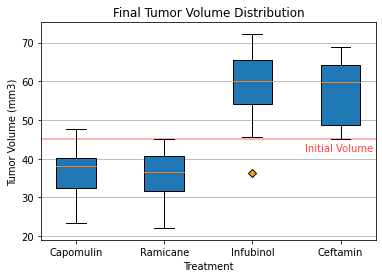

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [list for list in tumor_vol_data]
max_list = [max(list) for list in tumor_vol_data]
min_list = [min(list) for list in tumor_vol_data]
outlier_style = dict(markerfacecolor='orange', marker='D')
initial_vol = clean_data['Tumor Volume (mm3)'].loc[clean_data['Timepoint'] == 0].mean()

## BOX PLOT
## Set Box Plot parameters
plt.boxplot(data, patch_artist=True, flierprops=outlier_style)

# Give the chart a title, x label, and y label
plt.title("Final Tumor Volume Distribution")
plt.xlabel("Treatment")
plt.ylabel("Tumor Volume (mm3)")

# Set x_axis properties
x_axis = range(len(treatments))
tick_locations = [value+1 for value in x_axis]
plt.xticks(tick_locations, treatments, rotation=0)

# Set the limits of the x axis
plt.xlim(0.6, len(x_axis)+.4)

# Set the limits of the y axis
plt.ylim(min(min_list)-3, max(max_list)+3)

# Plot & Annotate horizontal line for Initual Tumor Volume (mm3)
plt.hlines(initial_vol, 0.6, len(x_axis)+.4, color='red', alpha=0.3, linestyle='-', linewidth=2.0)
plt.annotate("Initial Volume", (len(x_axis)-0.4, initial_vol-3), fontsize=10, color="red", alpha=0.75)

## Grid for y axis
plt.grid(axis='y')
## Show plot
plt.show()

## Line and Scatter Plots

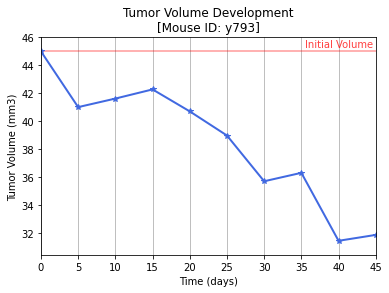

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
treatment = "Capomulin"
treatment_data = clean_data.loc[clean_data['Drug Regimen'] == treatment][['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Weight (g)']]

## Dependencies
import random as rd
## Random mouse sample (from mice with max timepoint value subset)
sample_mouse = rd.sample(list(treatment_data['Mouse ID'].loc[treatment_data['Timepoint'] == max(treatment_data['Timepoint'])]), 1)[0]
## Sample mouse data
sample_data = treatment_data.loc[treatment_data['Mouse ID'] == sample_mouse]

time_values = list(treatment_data.loc[treatment_data['Mouse ID'] == sample_mouse]['Timepoint'].values)
vol_values = list(treatment_data.loc[treatment_data['Mouse ID'] == sample_mouse]['Tumor Volume (mm3)'].values)

## LINE PLOT
## Set Line Plot parameters
plt.plot(time_values, vol_values, color='royalblue', alpha=1.0, linestyle='-', linewidth=2.0,  marker='*')

# Give the chart a title, x label, and y label
plt.title(f"Tumor Volume Development\n[Mouse ID: {sample_mouse}]")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")

# Set x_axis properties
x_axis = time_values
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation=0)

# Set the limits of the x axis
plt.xlim(0, x_axis[-1])

# Set the limits of the y axis
plt.ylim(min(vol_values)-1, max(vol_values)+1)

# Plot & Annotate horizontal line for Initual Tumor Volume (mm3)
plt.hlines(vol_values[0], min(time_values), max(time_values), color='red', alpha=0.3, linestyle='-', linewidth=2.0)
plt.annotate("Initial Volume",(time_values[-1]-9.5, vol_values[0]+0.3), fontsize=10, color="red", alpha=0.75)

## Grid for x axis
plt.grid(axis='x')
## Show plot
plt.show()

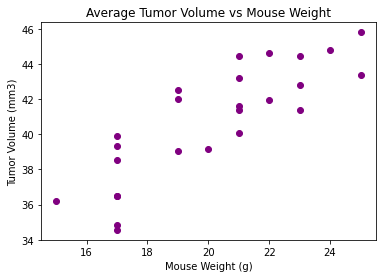

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
x_values = list(treatment_data.groupby('Mouse ID').mean()['Weight (g)'].values)
y_values = list(treatment_data.groupby('Mouse ID').mean()['Tumor Volume (mm3)'])

## SCATTER PLOT
## Set Scatter Plot parameters
plt.scatter(x_values, y_values, color='purple')

# Give the chart a title, x label, and y label
plt.title("Average Tumor Volume vs Mouse Weight")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

## Show plot
plt.show()

## Correlation and Regression

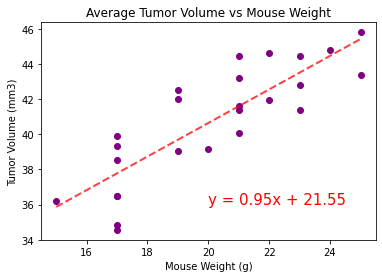

The correlation coefficient between mouse weight and average tumor volume is 0.84
The reggression r-squared is: 70.89%


In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

## Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
## Set regression line parameters (x0-x1)
regress_line_x = (min(x_values), max(x_values))
## Set regression line parameters (y0-y1)
regress_line_y = [min(x_values) * slope + intercept, max(x_values) * slope + intercept]
# Set regresion line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

## SCATTER PLOT
## Set Scatter Plot parameters
plt.scatter(x_values, y_values, color='purple')

# Give the chart a title, x label, and y label
plt.title("Average Tumor Volume vs Mouse Weight")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

## REGRESSION LINE PLOT
## Set Line Plot parameters
plt.plot(regress_line_x, regress_line_y, '--', color='red', alpha=0.75, linewidth=2)
## Annotate regression line equation
plt.annotate(line_eq, (20,36), fontsize=15, color='red')

## Show Plot
plt.show()

## Display Pearson Correlation & Regression R^2
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(stats.pearsonr(x_values, y_values)[0],2)}")
print(f"The reggression r-squared is: {rvalue**2:.2%}")